# Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 10 marks. 

---

1. Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

2. A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>
    
    In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by
    
    $$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$
    
    where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.
    
    (a) Show that this state obeys both properties (i) and (ii).    
    
    (b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that
    
    $$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$
    
    (Hint: take a look at Exercise 1(a), Worksheet 1)
    
    (c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

Text(0, 0.5, '$<\\hat \\sigma_{z}> = -tanh(\\frac{1}{2x})$')

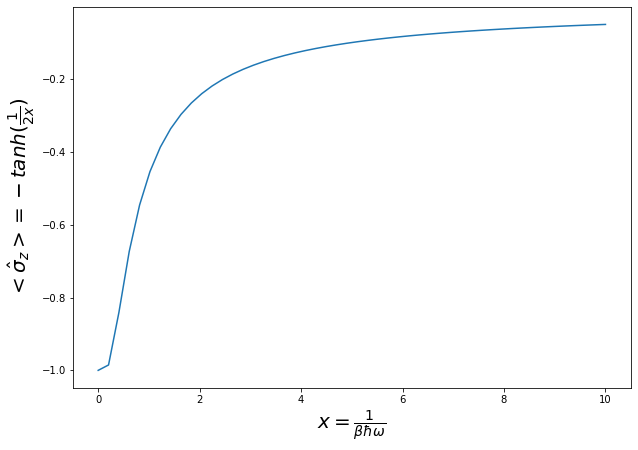

In [32]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0.000001,10)
plt.figure(figsize=(10,7))
plt.plot(x,-np.tanh(1/(2*x)))
plt.xlabel(r'$x = \frac{1}{\beta \hbar \omega}$',size=20)
plt.ylabel(r'$<\hat \sigma_{z}> = -tanh(\frac{1}{2x})$',size=20)


3. The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [33]:
from random import random
from random import choices
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

(array([ 54.,   0.,   0.,   0.,   0., 146.]),
 array([-0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1]),
 <BarContainer object of 6 artists>)

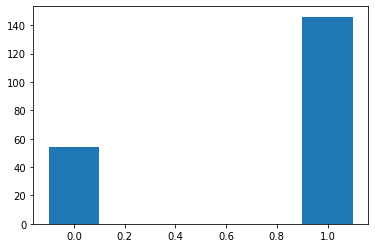

In [34]:
outcome = []

for i in range(200):
    outcome.append(biased_coin(0.3))

bins = [-0.1 + 0.2*i for i in range(7)]
plt.hist(outcome, bins = bins)

(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

(array([ 28.,   0.,   0.,   0.,   0., 108.,   0.,   0.,   0.,   0.,  64.]),
 array([-0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,
         2.1]),
 <BarContainer object of 11 artists>)

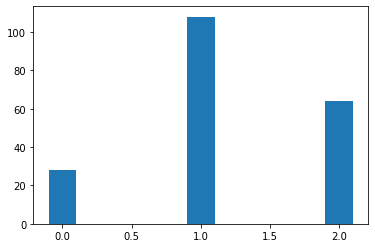

In [35]:
def three_biased_coin(p0,p1):
    r = random()
    if r<p0:
        return 0
    elif p0<r<p0+p1:
        return 1
    else:
        return 2
    
outcome = []
bins = [-0.1 + 0.2*i for i in range(12)]
for i in range(200):
    outcome.append(three_biased_coin(0.2,0.5))


plt.hist(outcome,bins=bins)

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

In [36]:
def n_side_coin(p):                                      #the p passed to the function is a list of probabilities
    r = np.ones(len(p))*random()                         #we basically test where r appears on the {0,1} number line
    probsum = np.cumsum(p)                         #similar to the cumulative distribution method
    x = r>probsum                   #we create a boolean array which reveals where r sits on this numberline
    return x.sum()                  #if we sum the true values it outputs the result of the coin toss

The idea of the above is to build up the numberline of [0,1] with bins of width = to the probability of that coin toss outcome occuring. These bins are numbered by the coin toss outcome itself. Then a random number r is generated and we define the coin toss outcome by what bin number it sits in.

In [37]:
#im adding in a function to define bins for the histograms for ease of viewing

def create_bins(l):
    bins = [-0.1+0.2*i for i in range(7+5*(l-2))]
    bins=np.array(bins)
    return bins

Text(0.5, 1.0, 'Coin toss predictions')

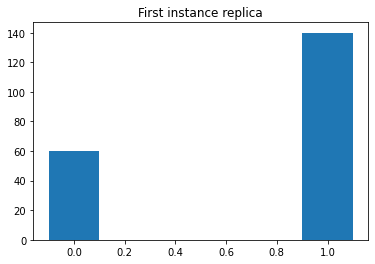

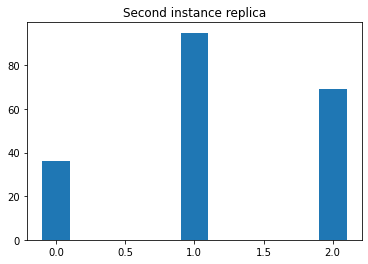

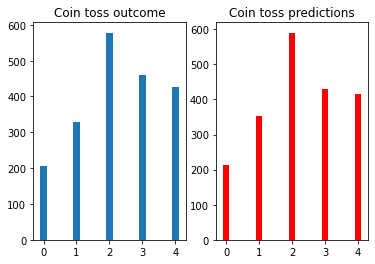

In [38]:
#we can repeat the coin for the above cases and some other random case
outcome = []
probs = [0.3,0.7]
bins = create_bins(len(probs))
for i in range(200):
    outcome.append(n_side_coin(probs))

plt.figure()
plt.hist(outcome,bins = bins)
plt.title('First instance replica')

outcome = []
probs = [0.2,0.5,0.3]
for i in range(200):
    outcome.append(n_side_coin(probs))

plt.figure()
bins = create_bins(len(probs))
plt.hist(outcome,bins = bins)
plt.title('Second instance replica')

#now we do a random case of N sided coin, I'm going to restrct N to be less than 10 
outcome = []
probs = []
l = np.random.choice(np.arange(1,10))

for j in range(l):
    probs.append(random())

probs=np.array(probs)
probs/=probs.sum()      #probabilities should add to 1



bins = create_bins(len(probs))
for i in range(2000):
    outcome.append(n_side_coin(probs))

#now I create a prediction list to see if the function is working properly
predictions = np.ones(l)*2000*probs
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(outcome,bins = bins)
ax1.set_title('Coin toss outcome')
ax2.bar(np.arange(l),predictions,color='r',width=0.2)
ax2.set_title('Coin toss predictions')

(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

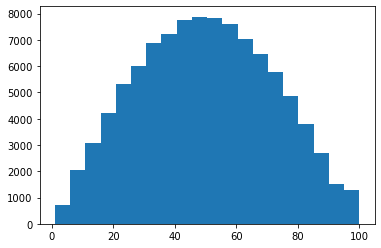

In [39]:
#we want to create a probability density based off the above function
r = np.linspace(0,1,100)
problist = 1/100*np.array([np.pi/2*np.sin(np.pi*x) for x in r])  #creates a roughly normalised probability density

outcome=np.zeros(100000)
for i in range(100000):
    outcome[i]=n_side_coin(problist)

plt.figure()
plt.hist(outcome,bins=20)
plt.show()

This way to sample from a random distribution in python is essentially similar as using the cumulative probability distribution method.
The first thing we calculate is the cumulative probability distribution, given by $$\int_{0}^{t} p(x) dx = \xi$$

In our case this results in 
$$\int_{0}^{t} \frac{\pi}{2} \sin(\pi x) dx = \frac{1}{2}(1-Cos(\pi t)) = \xi$$

This is the probability that the sample is less than t. If we invert this, it gives us a point on the cumulative distribution function if we start with a probability. 

$$\frac{\arccos(1-2\xi)}{\pi} = t$$

So now bascially every outcome $t$ has been mapped to a number $\xi$ between 0 and 1. So all we have to do is generate a random number in this range and use the inverse function to map it back to an outcome.

Text(0.5, 1.0, 'Outcome of sampling')

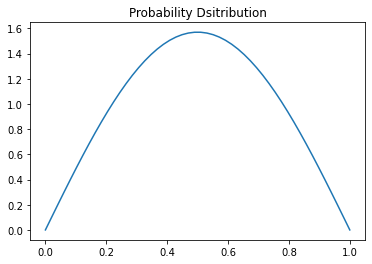

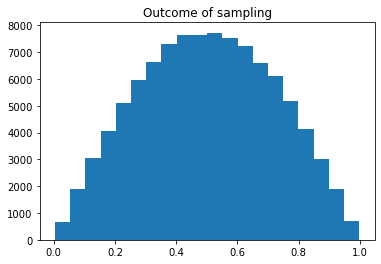

In [40]:
def sample(x):
  return np.arccos(1-2*x)/np.pi 

x = np.array([random() for i in range(100000)])  #here we generate our random numbers between 0 and 1
outcome = np.array(sample(x))

x1 = np.linspace(0,1)
plt.figure(1)
plt.plot(x1,np.pi/2*np.sin(np.pi*x1))  #plot the probability density to compare to the outcome
plt.title('Probability Dsitribution')

plt.figure(2)
plt.hist(outcome,bins=20)
plt.title('Outcome of sampling')


4. In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

    (a) Write down general expressions for the density matrices corresponding to both of the above states.

    (b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.

    (c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.

    (d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.

5. Consider the following simple decoherence model for a qubit. The Hamiltonian is 
    $$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
    where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.
    
    (a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.
    
    (b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

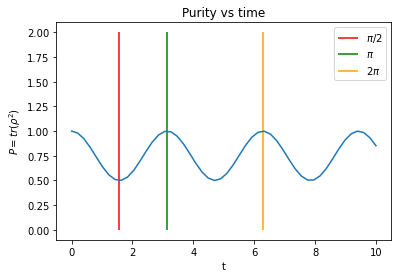

In [41]:
def purity(x):
    return 1/2+1/2*(np.cos(x)*np.cos(x))  #the purity calculated analytically

#lets assume w0 = 1 so we can just plot as a function of time

t = np.linspace(0,10)
plt.plot(t,purity(t))

plt.vlines(np.pi/2,0,2,color='r',label='$\pi/2$')
plt.vlines(np.pi,0,2,color='g',label='$\pi$')
plt.vlines(np.pi*2,0,2,color='orange',label='$2\pi$')

plt.xlabel('t')
plt.ylabel(r'$P = tr(\rho ^{2})$')
plt.title('Purity vs time')
plt.legend()
plt.show()

As we can see at the marked points the system is reaching the points of being maximally mixed and maximally pure. At t = pi/2 we see the purity = 0.5, this is a maximally mixed state. The other two correspond to pure states i.e states that cannot be represented as a mxture of other states.

6. Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

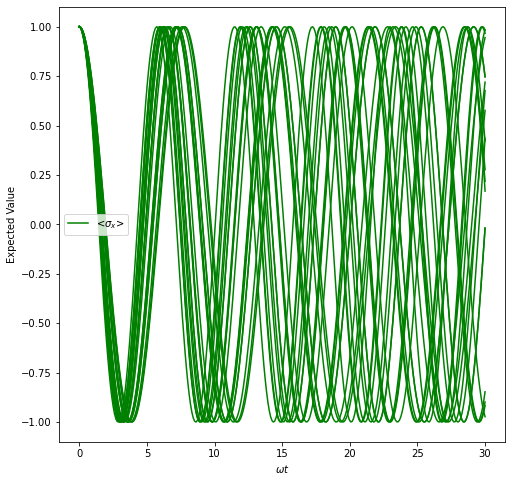

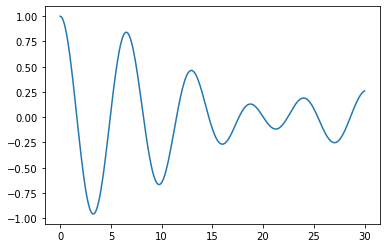

In [43]:
#here I pick w0 = 1 and sample 20 ws from the distribution defined by w0 and g
from scipy.linalg import expm

def H(omega):
    return 0.5*sigz*omega

def U(dt,H1):
    return expm(-1j*H1*dt)

sigx = np.array([[0,1],[1,0]])
sigy = np.array([[0,-1j],[1j,0]])
sigz = np.array([[1,0],[0,-1]])

plus = 1/np.sqrt(2)*np.array([1,1])   #define the initial state
dt = 0.1
times = np.linspace(0,30,int(30/dt)) # time array

w0= 1.0    #mean of distribution
g = 0.1*w0 # std of dsitribution
M = 20     # rnd realisations
w = np.random.normal(w0, g, M) # gives us 20 randomly chosen w from the defined gaussian distribution

expec_sigx    = np.zeros((M, len(times)))  #here I create 20 instances of the expectation value of sigx evolving in time

def expec(p,a):
    return np.trace(a@p).real                #returns the expectation value of an operator a when state is p


for k,w1 in enumerate(w):
    p1 = np.outer(plus,plus)  #initial density matrix
    Ham = H(w1)               #define the hamiltonian for this given w
    #print(Ham)

    for j,t in enumerate(times): 
        expec_sigx[k,j]=expec(p1,sigx)
        p1 = U(dt,Ham)@p1@np.conj(U(dt,Ham).T)


plt.figure(figsize=(8,8))
for i in range(M-1):  
    plt.plot(times, expec_sigx[i], 'g')
    
plt.plot(times, expec_sigx[i], 'g', label = '<$\sigma_x$>'  )
plt.xlabel('$\omega t$')
plt.ylabel('Expected Value')
plt.legend()
plt.show()

plt.figure()
plt.plot(times,np.mean(expec_sigx,axis=0))  #this plot if of the average trajectory, as we can see it is a decaying oscillation

For large numbers N we would expect this above graph to converge towards the exact expressoin given in the notes. i.e

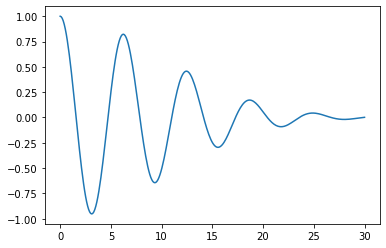

In [44]:
def p(t):
    return 1/2*np.array([[1,np.exp(-1j*t-(g*t)**2/2)],[np.exp(1j*t-(g*t)**2/2),1]])

def expec(p,a):
    return np.trace(a@p).real 

result = np.zeros(len(times))
for i,t in enumerate(times):
    result[i] = expec(p(t),sigx)

plt.plot(times,result)

As we can see this is very close and so it seems the sample size of 20 is a decent approximation to the larger sample case

7. The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

    (a) Verify that the Kraus operators above constitute a CPTP map.
    
    (b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

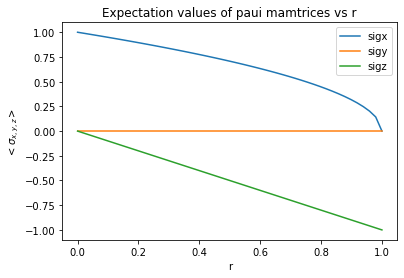

In [45]:
sigp = np.array([[0,1],[0,0]]); sigm = np.array([[0,0],[1,0]])

def k0(r):
    return np.sqrt(1-r)*sigp.dot(sigm)+sigm.dot(sigp)

def k1(r):
    return np.sqrt(r)*sigm

r = np.linspace(0,1)

p0 = 1/2*np.array([[1,1],[1,1]])
p = np.zeros((50,2,2))

for j, r1 in enumerate(r):
    p[j] = k0(r1)@p0@k0(r1).T+k1(r1)@p0@k1(r1).T

expecs = np.zeros((3,50))

for j, den in enumerate(p):
    expecs[0][j] = np.real(np.trace(sigx@den))
    expecs[1][j] = np.real(np.trace(sigy@den))
    expecs[2][j] = np.real(np.trace(sigz@den))
    
labels = ['sigx','sigy','sigz']
for i in range(3):
    plt.plot(r,expecs[i],label=labels[i])
    
    
plt.title('Expectation values of paui mamtrices vs r')
plt.xlabel('r')
plt.ylabel(r'$<\sigma_{x,y,z}>$')
plt.legend()

(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

Initial P = 
 [[0.5 0.5]
 [0.5 0.5]]


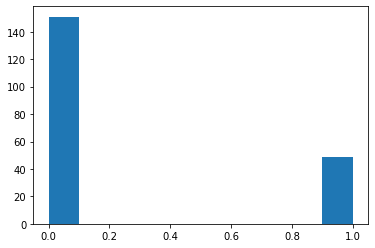

In [46]:
p = np.outer(plus,plus)
print('Initial P = \n',p)

#want to create a list of probabilities
probs = [np.trace(k0(0.5).T@k0(0.5)@p),np.trace(np.transpose(k1(0.5))@k1(0.5)@p)]

outcome=np.zeros(200)
for i in range(200):
    outcome[i]=n_side_coin(probs)

plt.figure()
plt.hist(outcome)
plt.show()

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

Initial P = 
 [[0.5 0.5]
 [0.5 0.5]]


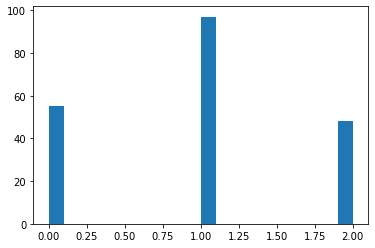

In [47]:
def k0(r):
    return np.sqrt(1-r)*sigp@sigm

def k1(r):
    return sigm@sigp

def k2(r):
    return np.sqrt(r)*sigm

p = np.outer(plus,plus)
print('Initial P = \n',p)

#want to create a list of probabilities
probs = [np.trace(k0(0.5).T@k0(0.5)@p),np.trace(k1(0.5).T@k1(0.5)@p),np.trace(k2(0.5).T@k2(0.5)@p)]

outcome=np.zeros(200)
for i in range(200):
    outcome[i]=n_side_coin(probs)

plt.figure()
plt.hist(outcome,bins=20)
plt.show()

As expected the frequencies of the 0 , 1 outcomes sum to give the 0 outcome of the previous realisation. Though now we have an outcome (1) that does not depend on our paramater r.  

8. (a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [48]:
#the kraus operators can be represented as the kronekers of the bras and kets of the basis of hilbert space b with the identity

k0 = np.kron(np.eye(2),np.array([1,0])) ; k1 = np.kron(np.eye(2),np.array([0,1]))

#now we verify the completeness relation, the below should be the identity of the full hilbert space

print(k0.T@k0+k1.T@k1)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

The Hamiltonian is:
 [[-0.75  0.    0.    0.  ]
 [ 0.   -0.25  0.25  0.  ]
 [ 0.    0.25 -0.25  0.  ]
 [ 0.    0.    0.    1.25]] 



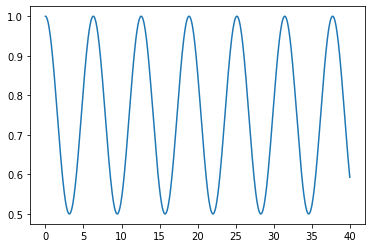

In [49]:
# Define 2x2 identity matrix
from scipy.linalg import expm
iden = np.eye(2)     

# Build the Hamiltonian and print it , taking wa = wb = 1 and j=v=0.5
H = -1.0/2*np.kron(sigz,iden) - 1.0/2*np.kron(iden,sigz) + 0.5/4*(np.kron(sigx,sigx) + np.kron(sigy,sigy)) + 0.5/2*np.kron(sigz,sigz)
print("The Hamiltonian is:\n", np.real(H), "\n")

#first I will create a timestep, final time and initial state, and a list to store evolved states
dt = 0.05
t = 40
up = np.array([1,0]); down = np.array([0,1])
initial = np.kron(down,up)
states = [initial]
times = np.linspace(0,t,int(t/dt))

#here we append to our list of states the timestep evolved states
for i in range(1,len(times)):
    states.append(expm(-1j*H*dt).dot(states[i-1]))

p=[]

states = np.array(states)

for j,s in enumerate(states):
    p.append(np.outer(np.conjugate(s),s))
    
    
p = np.array(p)
pa = np.array([k0@p1@k0.T+k1@p1@k1.T for p1 in p])

purity = [np.real(np.trace(p1.T@p1)) for p1 in pa]
plt.plot(times,purity)

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

The Hamiltonian is:
 [[-0.5   0.    0.    0.  ]
 [ 0.   -0.5   0.25  0.  ]
 [ 0.    0.25  0.    0.  ]
 [ 0.    0.    0.    1.  ]] 



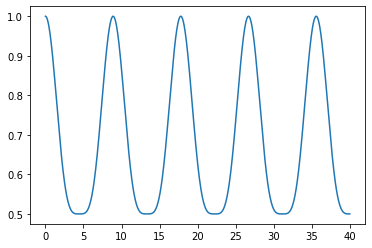

In [50]:
# Define 2x2 identity matrix
iden = np.eye(2)     

# Build the Hamiltonian and print it , taking wa = wb = 1 and j=v=0.5
H = -1.0/2*np.kron(sigz,iden) - 0.5/2*np.kron(iden,sigz) + 0.5/4*(np.kron(sigx,sigx) + np.kron(sigy,sigy)) + 0.5/2*np.kron(sigz,sigz)
print("The Hamiltonian is:\n", np.real(H), "\n")

#first I will create a timestep, final time and initial state, and a list to store evolved states
dt = 0.05
t = 40
up = np.array([1,0]); down = np.array([0,1])
initial = np.kron(down,up)
states = [initial]
times = np.linspace(0,t,int(t/dt))

#here we append to our list of states the timestep evolved states
for i in range(1,len(times)):
    states.append(expm(-1j*H*dt).dot(states[i-1]))

p=[]

states = np.array(states)

for j,s in enumerate(states):
    p.append(np.outer(np.conjugate(s),s))
    
    
p = np.array(p)
pa = np.array([k0@p1@k0.T+k1@p1@k1.T for p1 in p])

purity = [np.real(np.trace(p1.T@p1)) for p1 in pa]
plt.plot(times,purity)

When there is a difference in the frequencies $\omega_{A}$ and $\omega_{B}$ the system remains in a state with $P = 0.5$ for a period of time. The oscillations also occur with a lower frequency in the second case compared to the first. 